In [18]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

/Users/dilhan.manawadu/Projects/proteinfolding/notebooks/local_testing


'Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload.'

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

print(f"Root directory: {root_dir} is added to sys.path")


Root directory: /Users/aag/Documents/proteinfolding is added to sys.path


In [3]:
## test imports

from proteinfolding import * ## should run without errors

##TODO: proper testing ##

In [5]:
num_res = 5
num_rot = 5
p = 1
alpha = 1
shots = 10

from proteinfolding.supporting_functions import get_q_hamiltonian, get_hamiltonian, get_XY_mixer

H_NN = get_hamiltonian(num_rot=num_rot, num_res=num_res)

qubits = num_res * num_rot
H_q = get_q_hamiltonian(num_qubits=qubits, H=H)
XY = get_XY_mixer(num_qubits=qubits, num_rot=num_rot)

def callback(quasi_dists, parameters, energy):
        print(f"quasi_dists: {quasi_dists}")
        intermediate_data.append(
            quasi_dists
        )

intermediate_data = []



/Users/aag/Documents/proteinfolding/notebooks/local_testing
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2025 [Rosetta PyRosetta4.Release.python310.m1 2025.06+release.029c6a159b896477003a14f78f472d4cd2cead46 2025-02-04T15:14:13] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.pyt

NameError: name 'H' is not defined

files already present, not generating
files already present, not generating


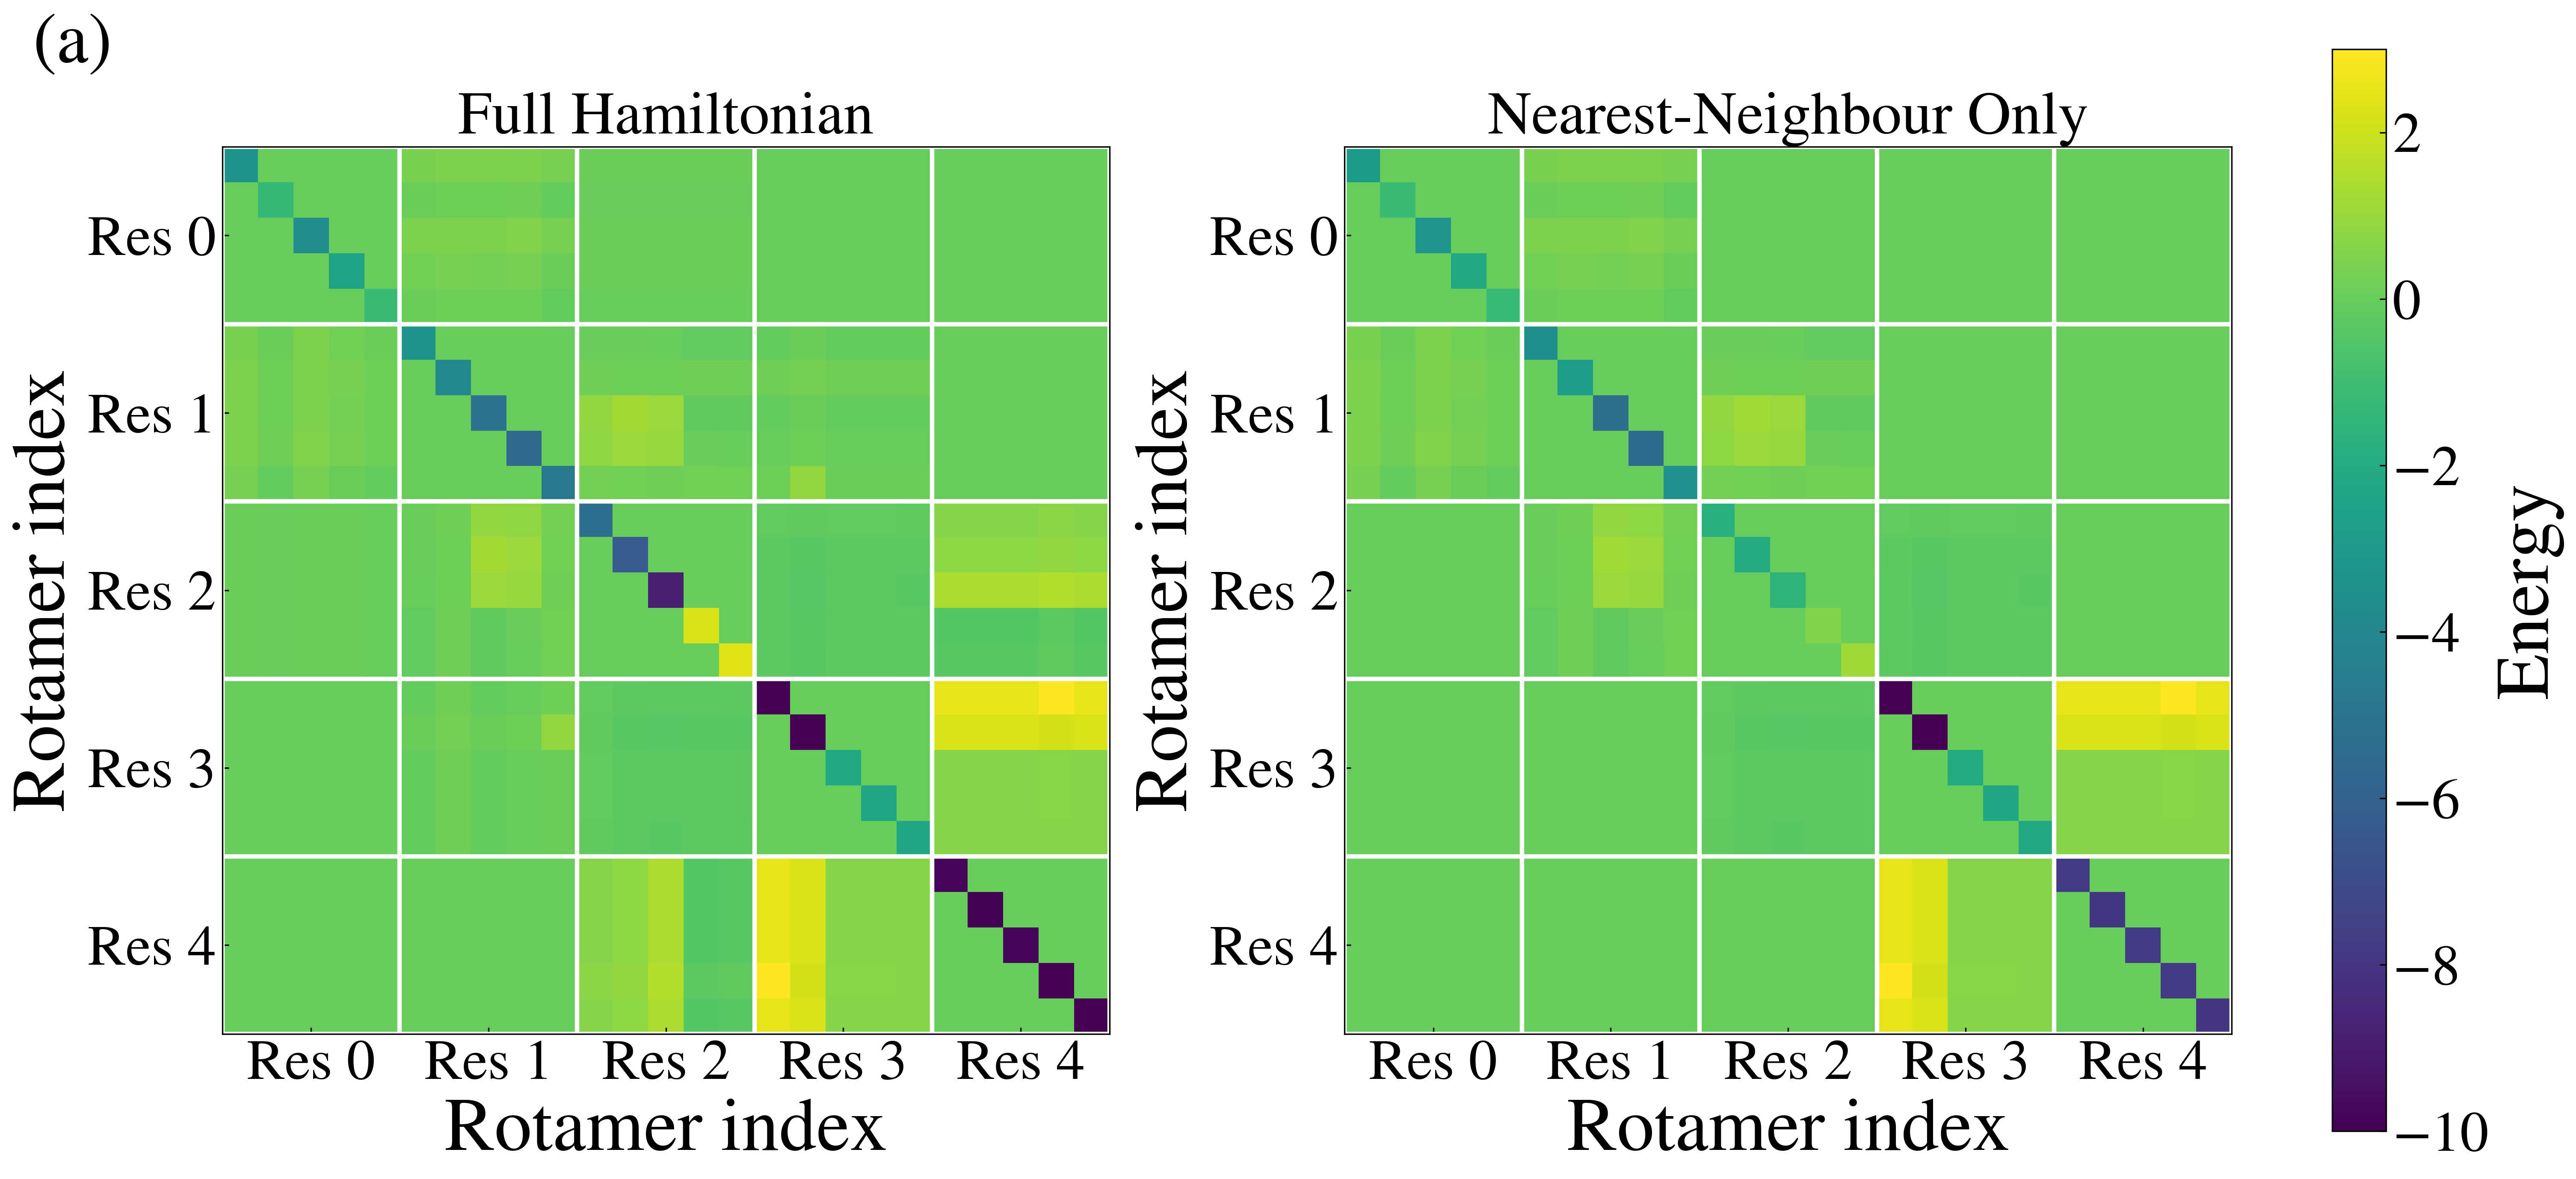

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from proteinfolding.supporting_functions import get_q_hamiltonian, get_hamiltonian, get_XY_mixer, get_hamiltonian_nonNN
import matplotlib as mpl

num_res = 5
num_rot = 5

H_NN = get_hamiltonian(num_rot=num_rot, num_res=num_res)
H = get_hamiltonian_nonNN(num_rot=num_rot, num_res=num_res)

def plot_side_by_side(H, H_nn, num_res, num_rot):
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

    # vmin = min(np.min(H), np.min(H_nn))
    # vmax = max(np.max(H), np.max(H_nn))
    vmin = -10
    vmax = 3

    tick_positions = np.arange(0, num_res * num_rot + 1, num_rot)

    ims = []
    for ax, matrix, title in zip(axs, [H, H_nn], ["Full Hamiltonian", "Nearest-Neighbour Only"]):
        im = ax.imshow(matrix, cmap="viridis", vmin=vmin, vmax=vmax)
        ims.append(im)

        # Draw thick residue boundaries
        for t in tick_positions:
            ax.axhline(t - 0.5, color="white", linewidth=2.5)
            ax.axvline(t - 0.5, color="white", linewidth=2.5)

        ax.set_title(title, fontsize=34)
        ax.set_xlabel("Rotamer index", fontsize=42)
        ax.set_ylabel("Rotamer index", fontsize=42)
        ax.set_xticks(tick_positions[:-1] + num_rot // 2)
        ax.set_yticks(tick_positions[:-1] + num_rot // 2)
        ax.set_xticklabels([f"Res {i}" for i in range(num_res)], fontsize=32)
        ax.set_yticklabels([f"Res {i}" for i in range(num_res)], fontsize=32)
        ax.tick_params(axis='both', which='major', labelsize=32)

    fig.text(0.01, 0.95, "(a)", fontsize=40, va='top', ha='left')

    # Add single colorbar to the right of both plots
    cbar = fig.colorbar(ims[0], ax=axs, location='right', shrink=0.85, pad=0.05)
    cbar.set_label("Energy", fontsize=42)
    cbar.ax.tick_params(labelsize=32) 
    plt.style.use('/Users/aag/Documents/proteinfolding/proteinfolding/molecular.mplstyle')

    save_path = "/Users/aag/Documents/proteinfolding/plots/xy_qaoa"
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(os.path.join(save_path, f"full_vs_NN_{num_res}x{num_rot}.pdf"))
    plt.show()


plot_side_by_side(H=H, H_nn=H_NN, num_res=num_res, num_rot=num_rot)


files already present, not generating


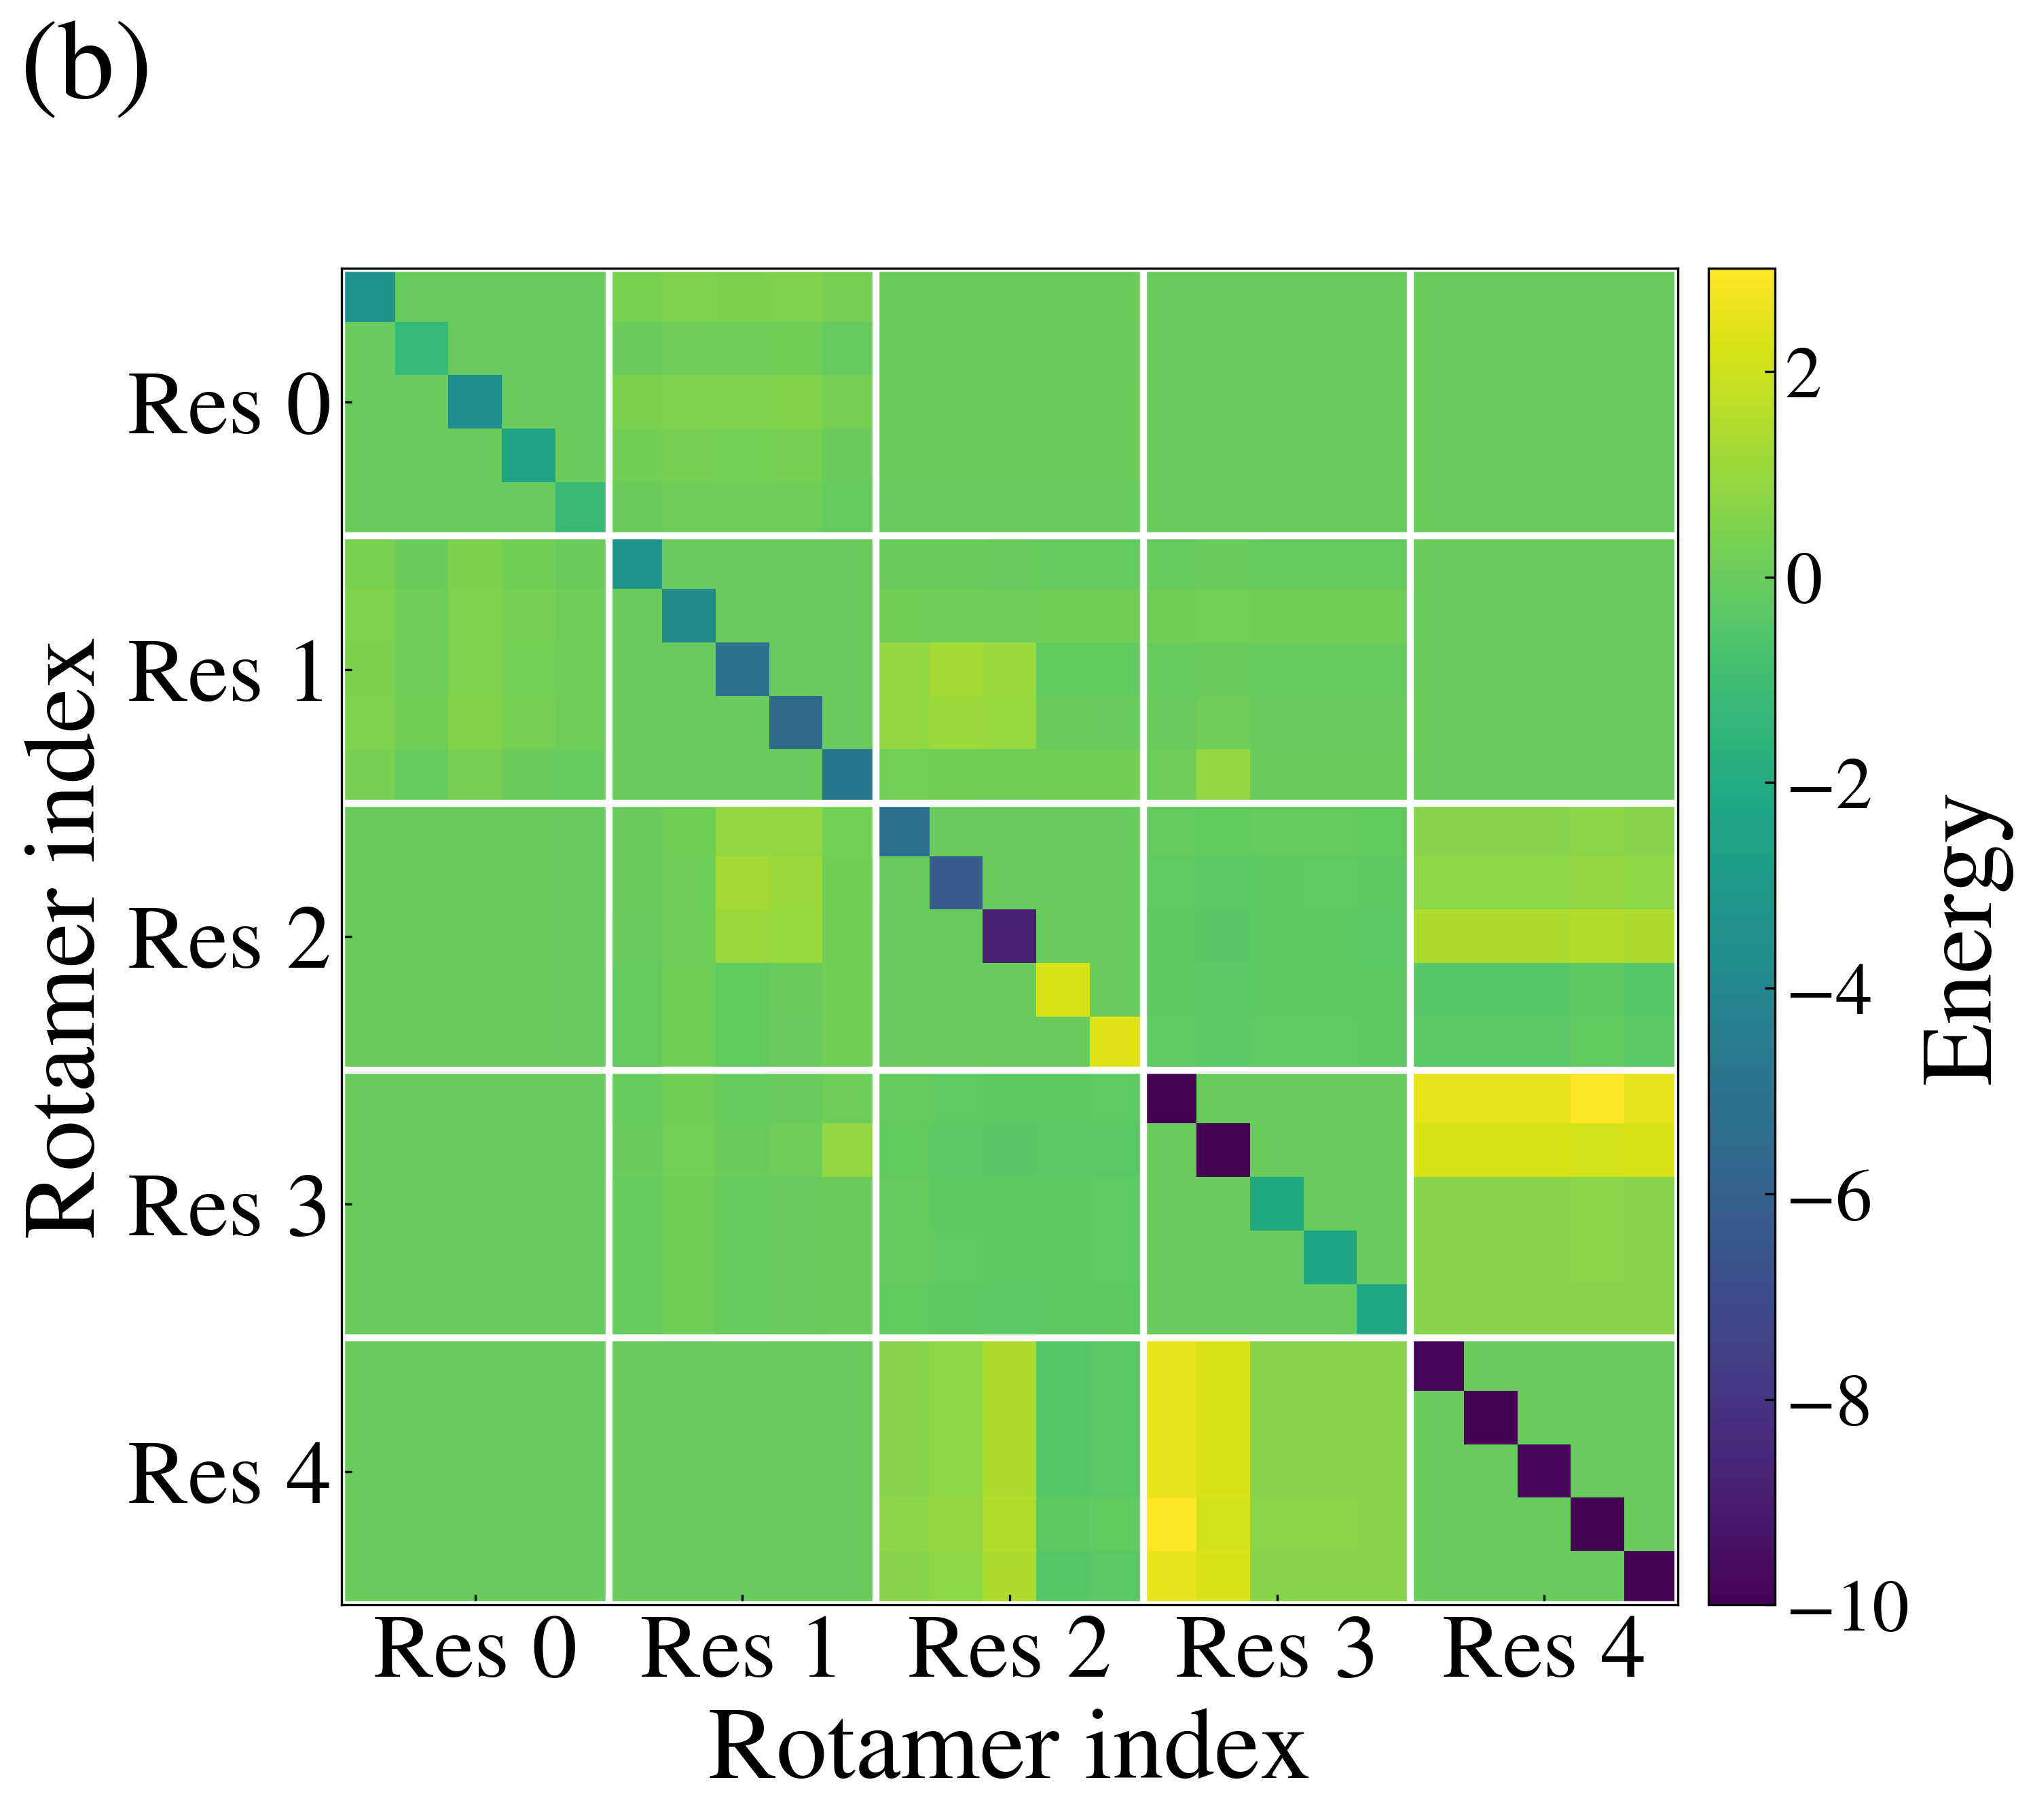

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
from proteinfolding.supporting_functions import get_hamiltonian_nonNN
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

num_res = 5
num_rot = 5

H = get_hamiltonian_nonNN(num_rot=num_rot, num_res=num_res)

def plot_full_hamiltonian(H, num_res, num_rot):
    plt.style.use('/Users/aag/Documents/proteinfolding/proteinfolding/molecular.mplstyle')

    fig, ax = plt.subplots(figsize=(10, 10))
    vmin = -10
    vmax = 3
    tick_positions = np.arange(0, num_res * num_rot + 1, num_rot)

    im = ax.imshow(H, cmap="viridis", vmin=vmin, vmax=vmax)

    # Residue boundaries
    for t in tick_positions:
        ax.axhline(t - 0.5, color="white", linewidth=2.5)
        ax.axvline(t - 0.5, color="white", linewidth=2.5)

    ax.set_xlabel("Rotamer index", fontsize=36)
    ax.set_ylabel("Rotamer index", fontsize=36)
    ax.set_xticks(tick_positions[:-1] + num_rot // 2)
    ax.set_yticks(tick_positions[:-1] + num_rot // 2)
    ax.set_xticklabels([f"Res {i}" for i in range(num_res)], fontsize=26)
    ax.set_yticklabels([f"Res {i}" for i in range(num_res)], fontsize=26)
    ax.tick_params(axis='both', which='major', labelsize=32)

    fig.text(0.01, 0.95, "(b)", fontsize=40, va='top', ha='left')

    # Make colorbar same height using make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label("Energy", fontsize=36)
    cbar.ax.tick_params(labelsize=26)

    # Save
    save_path = "/Users/aag/Documents/proteinfolding/plots/xy_qaoa"
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(os.path.join(save_path, f"full_{num_res}x{num_rot}.pdf"))
    plt.show()

plot_full_hamiltonian(H=H, num_res=num_res, num_rot=num_rot)


In [21]:
print(H)

[[-2.071751    0.          0.83668774  0.66194981  0.          0.        ]
 [ 0.         -3.50642526  1.69992959  1.25146365  0.          0.        ]
 [ 0.83668774  1.69992959 -2.8432052   0.         -0.01522029 -0.0601611 ]
 [ 0.66194981  1.25146365  0.         -2.1131629  -0.01373044 -0.05867127]
 [ 0.          0.         -0.01522029 -0.01373044 -0.51058396  0.        ]
 [ 0.          0.         -0.0601611  -0.05867127  0.         -1.04754053]]


In [ ]:
import itertools
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit
from proteinfolding.paths import PYROSETTA_ENERGY_DATA_ALL
import pandas as pd
import numpy as np

one_body_file = os.path.join(PYROSETTA_ENERGY_DATA_ALL, f"{num_rot}rot_{num_res}res_one_body_terms.csv")
two_body_file = os.path.join(PYROSETTA_ENERGY_DATA_ALL, f"{num_rot}rot_{num_res}res_two_body_terms.csv")

num_qubits = num_res * num_rot
df1 = pd.read_csv(one_body_file, usecols=['E_ii'])
df = pd.read_csv(two_body_file, usecols=['E_ij'])

q = df1['E_ii'].values
num = len(q)
value = df['E_ij'].values
Q = np.zeros((num, num), dtype=np.float64)
n = 0
idx = np.arange(0, num - num_rot, num_rot) 

for r1 in range(num_res):  
    for r2 in range(r1 + 1, num_res):
        r1_base = r1 * num_rot
        r2_base = r2 * num_rot

        for i in range(num_rot):
            for j in range(num_rot):
                idx1 = r1_base + i
                idx2 = r2_base + j
                Q[idx1, idx2] = value[n]
                Q[idx2, idx1] = value[n]
                n += 1

def check_hamming(bitstring, substring_size):
    substrings = [bitstring[i:i+substring_size] for i in range(0, len(bitstring), substring_size)]
    return all(sub.count('1') == 1 for sub in substrings)

def create_circuit(bitstring):
    """Create a quantum circuit that prepares the quantum state for a given bitstring."""
    qc = QuantumCircuit(len(bitstring))
    for i, bit in enumerate(bitstring):
        if bit == '1':
            qc.x(i)
    return qc

def evaluate_energy(bitstring, operator):
    """Evaluate the energy of a bitstring using the specified operator."""
    circuit = create_circuit(bitstring)
    state = Statevector.from_instruction(circuit)
    if not isinstance(operator, Operator):
        operator = Operator(operator)
    
    expectation_value = state.expectation_value(operator).real
    return expectation_value

substring_size = num_rot
possible_bitstrings = [''.join(x) for x in itertools.product('01', repeat=num_qubits)]
print("Total samples:", len(possible_bitstrings))

valid_samples = []
for bitstring in possible_bitstrings: 
    print("Checking formatted bitstring:", bitstring)
    if check_hamming(bitstring, substring_size):
        valid_samples.append((bitstring))

print("Valid samples found:", len(valid_samples))

k = 0
for i in range(num_qubits):
    k += 0.5 * q[i]

for i in range(num_qubits):
    for j in range(num_qubits):
        if i != j:
            k += 0.5 * 0.25 * Q[i][j]

lowest_energy = float('inf')
bitstring_with_lowest_energy = None

for bitstring in valid_samples:
    spins = [1 if bit == '0' else -1 for bit in bitstring]
    energy = 0

    for i in range(num_qubits):
        for j in range(num_qubits):
            if i != j:
                energy += 0.5 * H[i][j] * spins[i] * spins[j]

    for i in range(num_qubits):
        energy +=  H[i][i] * spins[i]

    print(f"Bitstring: {bitstring}, Value: {energy + k}")

    if energy < lowest_energy:
        lowest_energy = energy
        bitstring_with_lowest_energy = bitstring

print("Bitstring with lowest energy:", bitstring_with_lowest_energy)
print("Ground state energy", lowest_energy + k)




Total samples: 64
Checking formatted bitstring: 000000
Checking formatted bitstring: 000001
Checking formatted bitstring: 000010
Checking formatted bitstring: 000011
Checking formatted bitstring: 000100
Checking formatted bitstring: 000101
Checking formatted bitstring: 000110
Checking formatted bitstring: 000111
Checking formatted bitstring: 001000
Checking formatted bitstring: 001001
Checking formatted bitstring: 001010
Checking formatted bitstring: 001011
Checking formatted bitstring: 001100
Checking formatted bitstring: 001101
Checking formatted bitstring: 001110
Checking formatted bitstring: 001111
Checking formatted bitstring: 010000
Checking formatted bitstring: 010001
Checking formatted bitstring: 010010
Checking formatted bitstring: 010011
Checking formatted bitstring: 010100
Checking formatted bitstring: 010101
Checking formatted bitstring: 010110
Checking formatted bitstring: 010111
Checking formatted bitstring: 011000
Checking formatted bitstring: 011001
Checking formatted b

In [14]:
from scipy.sparse.linalg import eigsh

Z_matrix = np.array([[1, 0], [0, -1]])
identity = np.eye(2)

def construct_operator(qubit_indices, num_qubits):
    operator = np.eye(1)
    for qubit in range(num_qubits):
        if qubit in qubit_indices:
            operator = np.kron(operator, Z_matrix)
        else:
            operator = np.kron(operator, identity)
    return operator

C = np.zeros((2**num_qubits, 2**num_qubits))

for i in range(num_qubits):
    operator = construct_operator([i], num_qubits)
    C += H[i][i] * operator

for i in range(num_qubits):
    for j in range(i+1, num_qubits):
        operator = construct_operator([i, j], num_qubits)
        C += H[i][j] * operator

print('C :\n', C)

# Extract the ground state energy and wavefunction
# using sparse representation so as to be able to generalise to larger systems
eigenvalues, eigenvectors = eigsh(C, k=num, which='SA')
print("\n\nClassical optimisation results. \n")
print("Ground energy eigsh: ", eigenvalues[0])
print("ground state wavefuncion eigsh: ", eigenvectors[:,0])
print('\n\n')

C :
 [[-5.06317231  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -2.73056123  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -3.98356638 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 15.06603326  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          9.74614519
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   8.52321659]]


Classical optimisation results. 

Ground energy eigsh:  -10.29206809774041
ground state wavefuncion eigsh:  [-3.84425880e-17  8.58301404e-21 -1.33110523e-17 -2.87870881e-18
 -5.36726704e-18 -2.68894517e-18  9.29290769e-18 -1.06888629e-18
  9.15681692e-19 -7.59315011e-18  9.14877313e-18 -6.68817630e-18
  1.26075546e-17  5.14732024e-18 -4.42863944e-18  1.64733664e-18
 -7.29184740e-18 -1.15865935e-18  1.48175855e-17  5.42475479e-19
  1.38070486e-17  1.20673405e-17 -2.84084075e-18  4.80052117e-18
 -1.64253055e-17  7.48821842e-18 -6.9288788

In [9]:
import numpy as np
from proteinfolding.supporting_functions import generate_initial_bitstring
from qiskit import QuantumCircuit

initial_point = np.ones(2 * p)
initial_bitstring = generate_initial_bitstring(qubits, num_rot)
state_vector = np.zeros(2**qubits)
indexx = int(initial_bitstring, 2)
state_vector[indexx] = 1
qc = QuantumCircuit(qubits)
qc.initialize(state_vector, range(qubits))

/Users/aag/Documents/proteinfolding/notebooks/local_testing


In [10]:
from qiskit.primitives import Sampler
from qiskit_algorithms.minimum_eigensolvers import QAOA
from qiskit_algorithms.optimizers import COBYLA, SPSA

options= {
        "seed_simulator": 42,
        "shots": shots,
        "max_parallel_threads" : 0,
        "max_parallel_experiments" : 0,
        "max_parallel_shots" : 1,
        "statevector_parallel_threshold" : 16
    }

sampler = Sampler(options=options)

qaoa1 = QAOA(sampler=sampler, optimizer=COBYLA(), reps=p, initial_state=qc, mixer=XY, initial_point=initial_point,callback=callback, aggregation=alpha)
result1 = qaoa1.compute_minimum_eigenvalue(H_q)

quasi_dists: [{21: 0.6, 22: 0.3, 25: 0.1}]
quasi_dists: [{21: 0.7, 25: 0.2, 38: 0.1}]
quasi_dists: [{21: 0.6, 22: 0.2, 25: 0.1, 37: 0.1}]
quasi_dists: [{42: 1.0}]
quasi_dists: [{25: 0.1, 26: 0.3, 37: 0.1, 38: 0.1, 42: 0.4}]
quasi_dists: [{21: 0.9, 22: 0.1}]
quasi_dists: [{21: 0.9, 22: 0.1}]
quasi_dists: [{21: 0.8, 37: 0.2}]
quasi_dists: [{21: 0.8, 37: 0.1, 41: 0.1}]
quasi_dists: [{21: 0.6, 25: 0.3, 38: 0.1}]
quasi_dists: [{21: 0.5, 25: 0.2, 37: 0.2, 38: 0.1}]
quasi_dists: [{21: 0.9, 37: 0.1}]
quasi_dists: [{21: 0.7, 25: 0.1, 37: 0.2}]
quasi_dists: [{21: 0.6, 22: 0.1, 25: 0.3}]
quasi_dists: [{21: 0.8, 25: 0.1, 37: 0.1}]
quasi_dists: [{21: 0.9, 41: 0.1}]
quasi_dists: [{21: 0.8, 22: 0.1, 25: 0.1}]
quasi_dists: [{21: 0.5, 26: 0.2, 37: 0.3}]
quasi_dists: [{21: 0.8, 22: 0.1, 25: 0.1}]
quasi_dists: [{21: 0.6, 22: 0.1, 37: 0.2, 38: 0.1}]
quasi_dists: [{21: 0.9, 25: 0.1}]
quasi_dists: [{21: 0.5, 22: 0.1, 25: 0.3, 37: 0.1}]
quasi_dists: [{21: 0.9, 37: 0.1}]
quasi_dists: [{21: 0.9, 25: 0.1}]
quas

In [11]:
intermediate_data


[[{21: 0.6, 22: 0.3, 25: 0.1}],
 [{21: 0.7, 25: 0.2, 38: 0.1}],
 [{21: 0.6, 22: 0.2, 25: 0.1, 37: 0.1}],
 [{42: 1.0}],
 [{25: 0.1, 26: 0.3, 37: 0.1, 38: 0.1, 42: 0.4}],
 [{21: 0.9, 22: 0.1}],
 [{21: 0.9, 22: 0.1}],
 [{21: 0.8, 37: 0.2}],
 [{21: 0.8, 37: 0.1, 41: 0.1}],
 [{21: 0.6, 25: 0.3, 38: 0.1}],
 [{21: 0.5, 25: 0.2, 37: 0.2, 38: 0.1}],
 [{21: 0.9, 37: 0.1}],
 [{21: 0.7, 25: 0.1, 37: 0.2}],
 [{21: 0.6, 22: 0.1, 25: 0.3}],
 [{21: 0.8, 25: 0.1, 37: 0.1}],
 [{21: 0.9, 41: 0.1}],
 [{21: 0.8, 22: 0.1, 25: 0.1}],
 [{21: 0.5, 26: 0.2, 37: 0.3}],
 [{21: 0.8, 22: 0.1, 25: 0.1}],
 [{21: 0.6, 22: 0.1, 37: 0.2, 38: 0.1}],
 [{21: 0.9, 25: 0.1}],
 [{21: 0.5, 22: 0.1, 25: 0.3, 37: 0.1}],
 [{21: 0.9, 37: 0.1}],
 [{21: 0.9, 25: 0.1}],
 [{21: 0.9, 22: 0.1}],
 [{21: 0.8, 25: 0.1, 37: 0.1}],
 [{21: 0.9, 37: 0.1}],
 [{21: 0.8, 22: 0.1, 37: 0.1}],
 [{21: 0.6, 22: 0.1, 25: 0.2, 37: 0.1}]]

In [12]:
from proteinfolding.supporting_functions import int_to_bitstring
from proteinfolding.supporting_functions import calculate_bitstring_energy

for state in [5,6,9,10]:
    bitstring = int_to_bitstring(state, num_res*num_rot)
    energy = calculate_bitstring_energy(bitstring, H_q)
    print(f"State: {bitstring} Energy: {energy}")

/var/folders/zr/_ww60qvd18j868qh1qhtky300000gn/T/ipykernel_19667/497058870.py:6: DeprecationWarning: Option approximation=False is deprecated as of qiskit-aer 0.13. It will be removed no earlier than 3 months after the release date. Instead, use BackendEstimator from qiskit.primitives.
  energy = calculate_bitstring_energy(bitstring, H_q)


State: 000101 Energy: -2.4208674766123295
State: 000110 Energy: -3.4942309595644474
State: 001001 Energy: -2.2071903236210346
State: 001010 Energy: -3.2805538810789585


In [13]:
result1.best_measurement

{'state': 22,
 'bitstring': '010110',
 'value': (-3.6565208174288273+0j),
 'probability': 0.2}

In [30]:
from proteinfolding.paths import EXACT_DATA_ENERGY_BITSTRING_FILE
from proteinfolding.data_processing import find_min_energy_and_bitstring_from_exact_energy_dataframe
import pandas as pd

exact_data = pd.read_csv(EXACT_DATA_ENERGY_BITSTRING_FILE, compression='gzip')

df_filtered = exact_data[(exact_data['num_res'] == num_res) & (exact_data['num_rot'] == num_rot)]
if df_filtered.empty:
    raise Exception(f"No matching rows found for num_res = {num_res} and num_rot = {num_rot}")

# Instead of raising an error, select the row with the minimum energy
df_filtered = df_filtered.sort_values(by='energies').head(1)

min_energy, corresponding_bitstring = find_min_energy_and_bitstring_from_exact_energy_dataframe(exact_data, num_res, num_rot)
print(min_energy, corresponding_bitstring)  

found_min_energy = False